In [1]:
import pandas as pd 
import numpy as np 
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS 
from collections import Counter 
from textblob import TextBlob
# stopwords = set(STOPWORDS) 
# import pickle
# import pyLDAvis.sklearn
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.metrics import plot_confusion_matrix

In [2]:
entire=pd.read_csv('entire.csv')

In [3]:
entire

,Unnamed: 0.1,Unnamed: 0,Text,Label
0,0,0,The CDC currently reports 99031 deaths. In gen...,0
1,1,1,States reported 1121 deaths a small rise from ...,0
2,2,2,Politically Correct Woman (Almost) Uses Pandem...,1
3,3,3,#IndiaFightsCorona: We have 1524 #COVID testin...,0
4,4,4,Populous states can generate large case counts...,0
...,...,...,...,...
10695,10695,10695,#CoronaVirusUpdates: State-wise details of Tot...,0
10696,10696,10696,Tonight 12(midnight) onwards Disaster Manageme...,1
10697,10697,10697,296 new cases of #COVID19Nigeria; Plateau-85 E...,0
10698,10698,10698,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,0


In [4]:
final=pd.read_csv('final.csv')

In [5]:
final

,Text,Label
0,"Coronavirus India: Amid COVID-19 Worry, Govern...",0
1,The claim stated that India's top business con...,1
2,Facebook posts shared hundreds of times claim ...,1
3,"29 new COVID-19 cases reported in #China, a de...",0
4,UK hospital COVID-19 death toll rises by 761 t...,0
...,...,...
25824,COVID Biggest Cause of Police Deaths This Year,0
25825,10 Road Trip Essentials https://t.co/sB9hzYG2M...,1
25826,Union Health Minister Dr. Harsh Vardhan on Sun...,0
25827,Acc to @MoHFW_INDIA guidelines prior to exerci...,0


In [6]:
stops = set(stopwords.words("english"))

In [7]:
final

,Text,Label
0,"Coronavirus India: Amid COVID-19 Worry, Govern...",0
1,The claim stated that India's top business con...,1
2,Facebook posts shared hundreds of times claim ...,1
3,"29 new COVID-19 cases reported in #China, a de...",0
4,UK hospital COVID-19 death toll rises by 761 t...,0
...,...,...
25824,COVID Biggest Cause of Police Deaths This Year,0
25825,10 Road Trip Essentials https://t.co/sB9hzYG2M...,1
25826,Union Health Minister Dr. Harsh Vardhan on Sun...,0
25827,Acc to @MoHFW_INDIA guidelines prior to exerci...,0


In [8]:
entire=final.copy()

In [9]:
# entire = pd.concat([train, val, test])
# entire

In [10]:
entire

,Text,Label
0,"Coronavirus India: Amid COVID-19 Worry, Govern...",0
1,The claim stated that India's top business con...,1
2,Facebook posts shared hundreds of times claim ...,1
3,"29 new COVID-19 cases reported in #China, a de...",0
4,UK hospital COVID-19 death toll rises by 761 t...,0
...,...,...
25824,COVID Biggest Cause of Police Deaths This Year,0
25825,10 Road Trip Essentials https://t.co/sB9hzYG2M...,1
25826,Union Health Minister Dr. Harsh Vardhan on Sun...,0
25827,Acc to @MoHFW_INDIA guidelines prior to exerci...,0


In [11]:
enitre=final.copy()

In [12]:
df=entire.copy()

In [13]:
df.reset_index(drop=True,inplace=True)

In [14]:
# df.drop('id',axis=1,inplace=True)


In [15]:
df

,Text,Label
0,"Coronavirus India: Amid COVID-19 Worry, Govern...",0
1,The claim stated that India's top business con...,1
2,Facebook posts shared hundreds of times claim ...,1
3,"29 new COVID-19 cases reported in #China, a de...",0
4,UK hospital COVID-19 death toll rises by 761 t...,0
...,...,...
25824,COVID Biggest Cause of Police Deaths This Year,0
25825,10 Road Trip Essentials https://t.co/sB9hzYG2M...,1
25826,Union Health Minister Dr. Harsh Vardhan on Sun...,0
25827,Acc to @MoHFW_INDIA guidelines prior to exerci...,0


In [16]:
df.isnull().any()

Text     False
Label    False
dtype: bool

In [17]:
df.loc[df['Label']=='fake',:]

,Text,Label


In [18]:
df.loc[df['Label']=='real',:]

,Text,Label


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25829 entries, 0 to 25828
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    25829 non-null  object
 1   Label   25829 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 403.7+ KB


In [20]:
df.describe()

,Label
count,25829.000000
mean,0.449495
std,0.497452
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [21]:
# entire.to_csv('entire.csv')

In [22]:
print(entire['Label'].value_counts())


0    14219
1    11610
Name: Label, dtype: int64


In [23]:
combined = entire['Text']
fake = entire.loc[entire['Label']==1,'Text']
real = entire.loc[entire['Label']==0,'Text']


In [24]:
fake

1        The claim stated that India's top business con...
2        Facebook posts shared hundreds of times claim ...
7        The health service in Ireland is asking people...
9        *Let's stay at home and safeguard our health! ...
10       Brahmins (a Higher Indian Caste) chopped off a...
                               ...                        
25813    The science is clear." Meharry’s Dr. James Hil...
25819     A man was beaten by the cops in Dehradun, Ind...
25820    Every worker on the front lines of the fight a...
25822     Dr. Vandana Tiwari, part of the team investig...
25825    10 Road Trip Essentials https://t.co/sB9hzYG2M...
Name: Text, Length: 11610, dtype: object

In [25]:
real

0        Coronavirus India: Amid COVID-19 Worry, Govern...
3        29 new COVID-19 cases reported in #China, a de...
4        UK hospital COVID-19 death toll rises by 761 t...
5        WHO Director-General pays tribute to Spain’s s...
6        #IndiaFightsCorona: #COVID19 does not even spa...
                               ...                        
25823    #IndiaFightsCirona The gap between Recoveries ...
25824       COVID Biggest Cause of Police Deaths This Year
25826    Union Health Minister Dr. Harsh Vardhan on Sun...
25827    Acc to @MoHFW_INDIA guidelines prior to exerci...
25828    Too little data for recommendations in Covid-1...
Name: Text, Length: 14219, dtype: object

In [26]:
avg_comlen=sum(len(x) for x in combined) / len(combined)
avg_fakelen=sum(len(x) for x in fake) / len(fake)
avg_reallen=sum(len(x) for x in real) / len(real)

In [27]:
avg_comlen


209.73963374501528

In [28]:
avg_fakelen


190.8783807062877

In [29]:
avg_reallen

225.14009424010126

In [30]:
avg_wrdcmb=sum(len(x.split()) for x in combined) / len(combined)

avg_wrdfake=sum(len(x.split()) for x in fake) / len(fake)

avg_wrdreal=sum(len(x.split()) for x in real) / len(real)


In [31]:
avg_wrdcmb

31.057996825273918

In [32]:
avg_wrdfake

30.685271317829457

In [33]:
avg_wrdreal

31.362332090864335

In [34]:
def concat_all_sentences(sents):
    all_tokens = ''
    for text in sents:
        tx = str(text).lower().strip()
        tx = tx.replace('\n',' ')
        tx = tx.replace('&amp',' ')
        tx = tx.replace('#','')
        tx = tx.replace('-','')
        tx = tx.replace(';','')
        tx = " ".join(tx.split())
        all_tokens += tx + " "
    return all_tokens

In [35]:
stops = set(stopwords.words("english"))

In [36]:
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text) 
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [37]:
entire

,Text,Label
0,"Coronavirus India: Amid COVID-19 Worry, Govern...",0
1,The claim stated that India's top business con...,1
2,Facebook posts shared hundreds of times claim ...,1
3,"29 new COVID-19 cases reported in #China, a de...",0
4,UK hospital COVID-19 death toll rises by 761 t...,0
...,...,...
25824,COVID Biggest Cause of Police Deaths This Year,0
25825,10 Road Trip Essentials https://t.co/sB9hzYG2M...,1
25826,Union Health Minister Dr. Harsh Vardhan on Sun...,0
25827,Acc to @MoHFW_INDIA guidelines prior to exerci...,0


In [38]:
entire2=entire.loc[:,:]
entire2

,Text,Label
0,"Coronavirus India: Amid COVID-19 Worry, Govern...",0
1,The claim stated that India's top business con...,1
2,Facebook posts shared hundreds of times claim ...,1
3,"29 new COVID-19 cases reported in #China, a de...",0
4,UK hospital COVID-19 death toll rises by 761 t...,0
...,...,...
25824,COVID Biggest Cause of Police Deaths This Year,0
25825,10 Road Trip Essentials https://t.co/sB9hzYG2M...,1
25826,Union Health Minister Dr. Harsh Vardhan on Sun...,0
25827,Acc to @MoHFW_INDIA guidelines prior to exerci...,0


In [39]:
entire2['Text']=entire2['Text'].map(lambda x: cleantext(x))

In [40]:
entire2

,Text,Label
0,coronavirus india amid covid 19 worry governme...,0
1,claim stated india top business conglomerate t...,1
2,facebook posts shared hundreds times claim us ...,1
3,29 new covid 19 cases reported china delivery ...,0
4,uk hospital covid 19 death toll rises 761 12 8...,0
...,...,...
25824,covid biggest cause police deaths year,0
25825,10 road trip essentials coronavirus travel vac...,1
25826,union health minister dr harsh vardhan sunday ...,0
25827,acc mohfw india guidelines prior exercising gy...,0


In [41]:
combined2= entire2.loc[:,'Text']
fake2= entire2.loc[entire2['Label']==1,'Text']
real2= entire2.loc[entire2['Label']==0,'Text']


In [42]:
all_tokens = concat_all_sentences(combined)
fake_tokens = concat_all_sentences(fake)   
real_tokens = concat_all_sentences(real)

In [43]:
all_tokens2 = concat_all_sentences(combined2)
fake_tokens2 = concat_all_sentences(fake2)   
real_tokens2 = concat_all_sentences(real2)

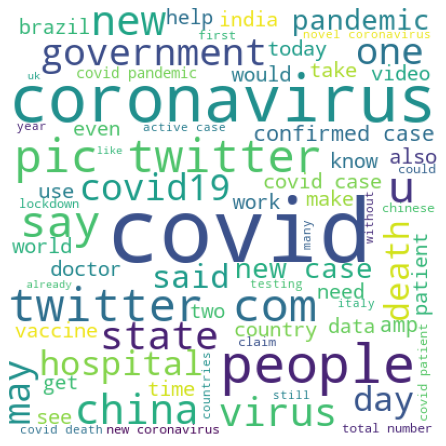

In [44]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stops ,#stopwords.union({'https','co','t.co'}), 
            min_font_size = 10).generate(all_tokens2) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

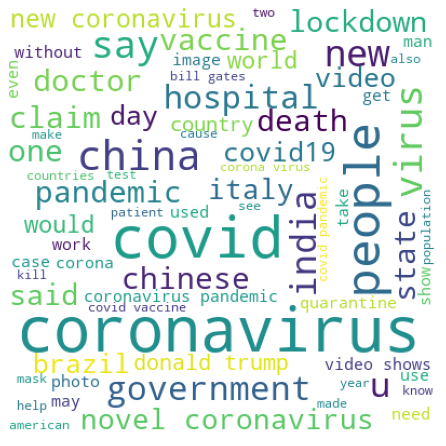

In [45]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stops,#stopwords.union({'https','co'}), 
            min_font_size = 10).generate(fake_tokens2) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

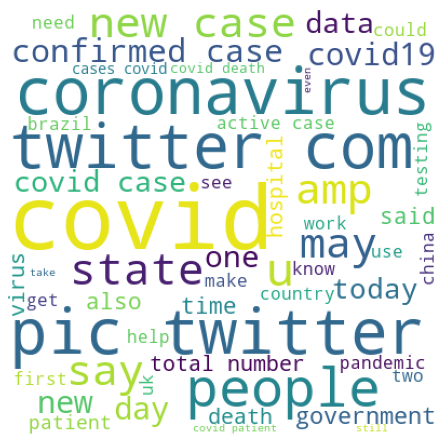

In [46]:
wordcloud = WordCloud(width = 400, height = 400, 
            background_color ='white', 
            stopwords = stops, #stopwords.union({'https','co'}), 
            min_font_size = 10).generate(real_tokens2) 

# plot the WordCloud image                        
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [47]:
print(len(set(all_tokens.split())))
print(len(set(fake_tokens.split())))
print(len(set(real_tokens.split())))
print(len(set(fake_tokens.split()).intersection(set(real_tokens.split()))))

74695
35004
53349
13658


In [48]:
all_tokens_words = [w for w in all_tokens.split() if w not in stops]
fake_tokens_words = [w for w in fake_tokens.split() if w not in stops]
real_tokens_words = [w for w in real_tokens.split() if w not in stops]

In [49]:
Counter(all_tokens_words).most_common(20)

[('covid19', 9934),
 ('coronavirus', 4997),
 ('cases', 3503),
 ('people', 3006),
 ('new', 2921),
 ('*', 1711),
 ('health', 1683),
 ('covid', 1447),
 ('deaths', 1380),
 ('covid19.', 1330),
 ('number', 1265),
 ('one', 1264),
 ('tests', 1262),
 ('virus', 1183),
 ('says', 1146),
 ('coronavirus.', 1129),
 ('government', 1126),
 ('...', 1105),
 ('states', 1102),
 ('state', 1102)]

In [50]:
Counter(fake_tokens_words).most_common(20)

[('coronavirus', 3109),
 ('covid19', 2708),
 ('people', 1546),
 ('coronavirus.', 989),
 ('...', 845),
 ('video', 784),
 ('virus', 733),
 ('president', 728),
 ('covid19.', 718),
 ('new', 714),
 ('chinese', 694),
 ('government', 648),
 ('*', 589),
 ('china', 587),
 ('says', 568),
 ('health', 559),
 ('one', 551),
 ('shows', 545),
 ('vaccine', 515),
 ('trump', 503)]

In [51]:
Counter(real_tokens_words).most_common(20)

[('covid19', 7226),
 ('cases', 3120),
 ('new', 2207),
 ('coronavirus', 1888),
 ('people', 1460),
 ('tests', 1132),
 ('health', 1124),
 ('*', 1122),
 ('covid', 1085),
 ('number', 1073),
 ('deaths', 1035),
 ('total', 988),
 ('reported', 913),
 ('confirmed', 890),
 ('states', 865),
 ('testing', 785),
 ('state', 762),
 ('one', 713),
 ('may', 662),
 ('covid19.', 612)]

In [52]:
entire3=entire2.copy()

In [53]:
# perform lemmantization 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def strlemmentize(string):
    wordnet_lemmatizer = WordNetLemmatizer()
    text =string
    text=string.split()
    text = [w for w in text if not w in stops]
    text=[wordnet_lemmatizer.lemmatize(x) for x in text]
    text2=" ".join(text)
    return  text2

    
    
    


In [54]:
entire3['lemma_string']=entire3['Text'].map(lambda x: strlemmentize(x))

In [55]:
entire3['lemma_string']

0        coronavirus india amid covid 19 worry governme...
1        claim stated india top business conglomerate t...
2        facebook post shared hundred time claim u pres...
3        29 new covid 19 case reported china delivery m...
4        uk hospital covid 19 death toll rise 761 12 86...
                               ...                        
25824                covid biggest cause police death year
25825    10 road trip essential coronavirus travel vaca...
25826    union health minister dr harsh vardhan sunday ...
25827    acc mohfw india guideline prior exercising gym...
25828    little data recommendation covid 19 bame repor...
Name: lemma_string, Length: 25829, dtype: object

In [56]:
entire3['lemma_list']=entire3['lemma_string'].map(lambda x: x.split())
entire3['lemma_list']

0        [coronavirus, india, amid, covid, 19, worry, g...
1        [claim, stated, india, top, business, conglome...
2        [facebook, post, shared, hundred, time, claim,...
3        [29, new, covid, 19, case, reported, china, de...
4        [uk, hospital, covid, 19, death, toll, rise, 7...
                               ...                        
25824         [covid, biggest, cause, police, death, year]
25825    [10, road, trip, essential, coronavirus, trave...
25826    [union, health, minister, dr, harsh, vardhan, ...
25827    [acc, mohfw, india, guideline, prior, exercisi...
25828    [little, data, recommendation, covid, 19, bame...
Name: lemma_list, Length: 25829, dtype: object

In [57]:
entire3['lemma_list'].count()

25829

In [58]:
entire3['lemma_string']

0        coronavirus india amid covid 19 worry governme...
1        claim stated india top business conglomerate t...
2        facebook post shared hundred time claim u pres...
3        29 new covid 19 case reported china delivery m...
4        uk hospital covid 19 death toll rise 761 12 86...
                               ...                        
25824                covid biggest cause police death year
25825    10 road trip essential coronavirus travel vaca...
25826    union health minister dr harsh vardhan sunday ...
25827    acc mohfw india guideline prior exercising gym...
25828    little data recommendation covid 19 bame repor...
Name: lemma_string, Length: 25829, dtype: object

In [59]:
entire3['sentiment']=entire3['lemma_string'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [60]:
entire3['sentiment']

0        0.000000
1        0.500000
2        0.000000
3        0.356566
4        0.000000
           ...   
25824    0.000000
25825    0.000000
25826   -0.031818
25827    0.000000
25828   -0.187500
Name: sentiment, Length: 25829, dtype: float64

In [61]:
entire3['word_count']=entire3['Text'].map(lambda x:len(x))

In [63]:
entire3['lemma_string']

0        coronavirus india amid covid 19 worry governme...
1        claim stated india top business conglomerate t...
2        facebook post shared hundred time claim u pres...
3        29 new covid 19 case reported china delivery m...
4        uk hospital covid 19 death toll rise 761 12 86...
                               ...                        
25824                covid biggest cause police death year
25825    10 road trip essential coronavirus travel vaca...
25826    union health minister dr harsh vardhan sunday ...
25827    acc mohfw india guideline prior exercising gym...
25828    little data recommendation covid 19 bame repor...
Name: lemma_string, Length: 25829, dtype: object

In [66]:
entire4=entire3.copy()

In [67]:
entire4.reset_index(drop=True,inplace=True)

In [68]:
entire4

,Text,Label,lemma_string,lemma_list,sentiment,word_count
0,coronavirus india amid covid 19 worry governme...,0,coronavirus india amid covid 19 worry governme...,"[coronavirus, india, amid, covid, 19, worry, g...",0.000000,114
1,claim stated india top business conglomerate t...,1,claim stated india top business conglomerate t...,"[claim, stated, india, top, business, conglome...",0.500000,114
2,facebook posts shared hundreds times claim us ...,1,facebook post shared hundred time claim u pres...,"[facebook, post, shared, hundred, time, claim,...",0.000000,170
3,29 new covid 19 cases reported china delivery ...,0,29 new covid 19 case reported china delivery m...,"[29, new, covid, 19, case, reported, china, de...",0.356566,127
4,uk hospital covid 19 death toll rises 761 12 8...,0,uk hospital covid 19 death toll rise 761 12 86...,"[uk, hospital, covid, 19, death, toll, rise, 7...",0.000000,75
...,...,...,...,...,...,...
25824,covid biggest cause police deaths year,0,covid biggest cause police death year,"[covid, biggest, cause, police, death, year]",0.000000,38
25825,10 road trip essentials coronavirus travel vac...,1,10 road trip essential coronavirus travel vaca...,"[10, road, trip, essential, coronavirus, trave...",0.000000,77
25826,union health minister dr harsh vardhan sunday ...,0,union health minister dr harsh vardhan sunday ...,"[union, health, minister, dr, harsh, vardhan, ...",-0.031818,138
25827,acc mohfw india guidelines prior exercising gy...,0,acc mohfw india guideline prior exercising gym...,"[acc, mohfw, india, guideline, prior, exercisi...",0.000000,197


In [70]:
# ax=plt.figure(figsize=(15,8))
# f=sns.distplot(data = entire4, x = "word_count",y='sentiment',kde=True)
# f.set(xlim=(0,100))
# ax.show()



In [78]:
# entire4['Label']=entire4['Label'].str.replace("real",0)
# entire4['Label']=entire4['Label'].str.replace("fake",1)

entire4['Label'] = entire4['Label'].map({'real':0 ,'fake':1})


In [79]:
entire4['Label'].dtypes

dtype('float64')

In [81]:
words = entire4['lemma_list']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [82]:
mostcommon = FreqDist(allwords).most_common(100)



In [83]:
mostcommon[0:10]

[('covid', 12029),
 ('19', 10674),
 ('coronavirus', 6979),
 ('case', 4885),
 ('people', 3482),
 ('new', 2997),
 ('covid19', 2959),
 ('state', 2877),
 ('death', 2620),
 ('test', 2207)]

In [84]:
mostcommondf=pd.DataFrame(mostcommon,columns=['word','count'])

In [85]:
mostcommondf.head()

,word,count
0,covid,12029
1,19,10674
2,coronavirus,6979
3,case,4885
4,people,3482


C:\Users\sah-1\AppData\Local\Temp\ipykernel_17740\2711842748.py:4: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



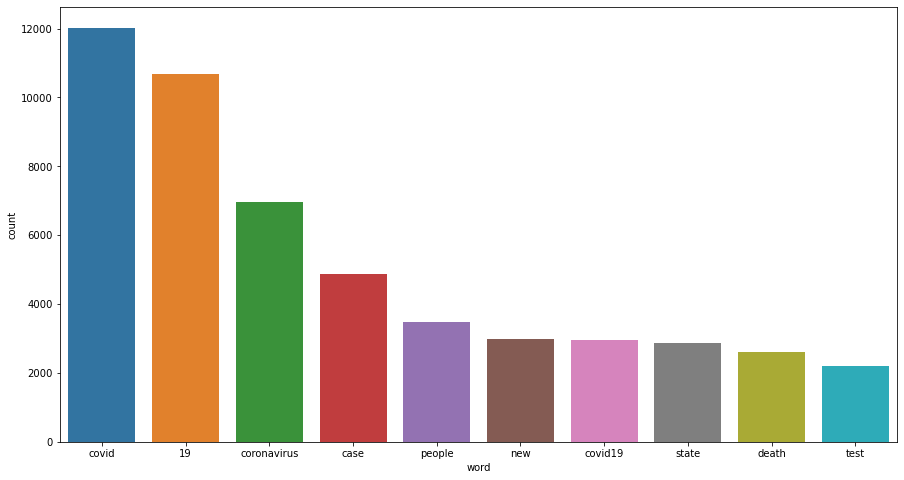

In [86]:
ax=plt.figure(figsize=(15,8))

sns.barplot(x ='word', y = 'count',data=mostcommondf[0:10])
ax.show()